# Описание проекта

Глауко́ма (др.-греч. γλαύκωμα «синее помутнение глаза»; от γλαυκός «светло-синий, голубой» + -ομα «опухоль») — большая группа глазных заболеваний, характеризующаяся постоянным или периодическим повышением внутриглазного давления выше толерантного для данного человека уровня с последующим развитием типичных дефектов поля зрения, снижением остроты зрения и атрофией зрительного нерва.

Различают две основные формы глаукомы: открытоугольная и закрытоугольная. Кроме того, существуют врожденная глаукома, ювенильная, различные формы вторичной глаукомы, в том числе связанные с аномалиями развития глаза.

Повышенное внутриглазное давление приводит к потере зрения в пораженном глазу(ах) и ведёт к слепоте, если его не лечить. Лечение способно лишь приостановить или замедлить потерю зрения. Это, как правило, связано с повышенным давлением жидкости в глазу (водянистой влаги)[1]. Термин "глазная гипертензия" используется для людей с последовательным повышением внутриглазного давления (ВГД) без любого связанного с этим повреждения зрительного нерва. С другой стороны, термин "нормально напряжённая" или "низко напряжённая" ("нормотензивная") глаукома используется в случаях повреждения зрительного нерва и соответствующей потери поля зрения, но при нормальном или пониженном внутриглазном давлении.

Характерной картиной повреждения нервов является потеря ганглиозных клеток сетчатки. Много различных подтипов глаукомы могут рассматриваться как типы оптической невропатии. Увеличенное внутриглазное давление (выше 21 мм рт или 2,8 кПа) является наиболее важным фактором риска для глаукомы. Тем не менее, некоторые из них могут иметь высокое внутриглазное давление в течение многих лет и никогда не получать повреждения, в то время как другие могут получить повреждение нервов при относительно низком давлении. Без лечения глаукомы это может привести к необратимому повреждению части зрительного нерва и, как следствие, потери части визуального поля, которая в течение долгого времени может прогрессировать до слепоты.

Когда венозный синус склеры заблокирован, то темпы поглощения внутриглазной жидкости отстают от темпов её секреции, происходит повышение внутриглазного давления. Давление в обоих камерах давит на хрусталик и стекловидное тело. Стекловидное тело прижимает сетчатку к сосудистой оболочке и сжимает кровеносные сосуды, питающие сетчатку. Без достаточного кровоснабжения, клетки сетчатки отмирают, что приводит к атрофии зрительного нерва, вызывая слепоту[2]. Как правило, удаленные от точки фокуса нервы страдают прежде остальных, потому что удалены от центра кровоснабжения глаза; таким образом, потеря зрения вследствие глаукомы, как правило, начинается по краям периферического поля зрения, что постепенно приводит к «туннельной» видимости окружающего мира.

![title](Glaukoma.jpg)

В настоящем проекте предлагается реализовать вспомогательную модель, основанную на принципах машинного обучения, которая способна классифицировать глаукому 

## Предобработка данных

Прежде всего представлен список подключённых модулей

In [135]:
# coding=utf8
from sklearn import cross_validation
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import xgboost as xgb
import re
import seaborn as sns
import math
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.cross_validation import StratifiedKFold
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

pd.set_option('display.width', 256)

%matplotlib inline

In [147]:
initial_data = pd.read_excel('all_best_perimetry.xls')

# Предлагаю удалить столбцы test и id (тест везде один , а в id врачи непонтно что пишут, 
#то с запятой то номера разные у одинаковых пациентов, а вот имена совпадают)
initial_data = initial_data.drop(['Test','ID'],axis=1) 
initial_data = initial_data.dropna(how='any')

display(initial_data.head(15))
data_500 = initial_data[0:4800]  # Выборка из 500 элементов исходных данных для быстрого построения графиков
print('Размер файла: ', initial_data.shape,' Пропущенные значения в файле отображены как NAN ')

x = data_500[['Age','Sph','PSD','Pupil','Fovea','MD']].apply(pd.to_numeric,errors='coerce',axis=1)
x = x.dropna(how='any')
Y =x['MD']
x=x.drop(['MD'],axis=1)
x['Eye'] = data_500['Eye']
x['Eye'] = pd.get_dummies(x['Eye'])

print(x.shape,Y.shape)
display(data_500.describe())
display(x.head(9))


,FIO,BirthDate,Eye,MeasDate,MeasTime,FixLos,F_POS_Err,F_NEG_Err,Duration,Fovea,Age,Sph,MD,PSD,Pupil
0,2HAH0V V.P.,1944-08-28,Left,2011-09-27,11:13,1/23,0.01,0.20,10:37,36,67,4.25,-19.91,13.14,4.8
1,2HAH0V V.P.,1944-08-28,Right,2011-09-27,11:00,2/21,0.00,0.00,09:19,35,67,5.00,-5.05,8.81,3.7
2,ABASHINA N.A.,1971-08-26,Left,2013-06-14,12:56,0/16,0.01,0.00,06:25,37,41,0.00,0.64,1.42,4.3
3,ABASHINA N.A.,1971-08-26,Right,2013-06-14,12:48,2/17,0.08,0.02,06:02,39,41,0.00,0.47,1.60,4.0
4,ABLIAZOV R.L.,1946-04-10,Right,2010-05-31,11:38,3/19,0.08,0.10,07:29,34,64,-2.25,-3.69,5.69,4.8
5,ABLOGINA M.N.,1961-06-13,Left,2010-12-10,13:10,2/21,0.01,0.11,09:13,34,49,-5.25,-7.87,3.63,3.8
6,ABLOGINA M.N.,1961-06-13,Left,2011-01-28,11:10,0/19,0.03,0.16,09:02,34,49,-5.25,-5.38,3.59,3.9
7,ABLOGINA M.N.,1961-06-13,Left,2011-12-13,13:59,1/17,0.00,0.03,07:14,35,50,-5.25,-3.11,2.30,4.2
8,ABLOGINA M.N.,1961-06-13,Right,2010-12-10,12:59,0/18,0.00,0.11,09:18,36,49,-2.25,-6.11,5.52,5.4
9,ABLOGINA M.N.,1961-06-13,Right,2011-01-28,11:00,1/19,0.01,0.04,06:50,37,49,-2.25,-1.79,2.73,4.6


Размер файла:  (4819, 15)  Пропущенные значения в файле отображены как NAN 
(4796, 6) (4796,)


,F_POS_Err,F_NEG_Err,Age,Sph,MD,PSD,Pupil
count,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000
mean,0.023021,0.031413,61.778333,1.638342,-2.635350,3.580829,4.731792
std,0.024871,0.050683,13.000955,3.419166,4.665921,3.203825,0.962054
min,0.000000,0.000000,0.000000,-21.700000,-26.340000,0.930000,1.400000
25%,0.000000,0.000000,55.000000,0.000000,-3.650000,1.740000,4.100000
50%,0.020000,0.010000,64.000000,2.500000,-1.180000,2.190000,4.700000
75%,0.030000,0.050000,71.000000,3.750000,0.220000,3.690000,5.400000
max,0.140000,0.710000,100.000000,11.200000,4.070000,18.400000,8.000000


,Age,Sph,PSD,Pupil,Fovea,Eye
0,67.0,4.25,13.14,4.8,36.0,1
1,67.0,5.00,8.81,3.7,35.0,0
2,41.0,0.00,1.42,4.3,37.0,1
3,41.0,0.00,1.60,4.0,39.0,0
4,64.0,-2.25,5.69,4.8,34.0,0
5,49.0,-5.25,3.63,3.8,34.0,1
6,49.0,-5.25,3.59,3.9,34.0,1
7,50.0,-5.25,2.30,4.2,35.0,1
8,49.0,-2.25,5.52,5.4,36.0,0


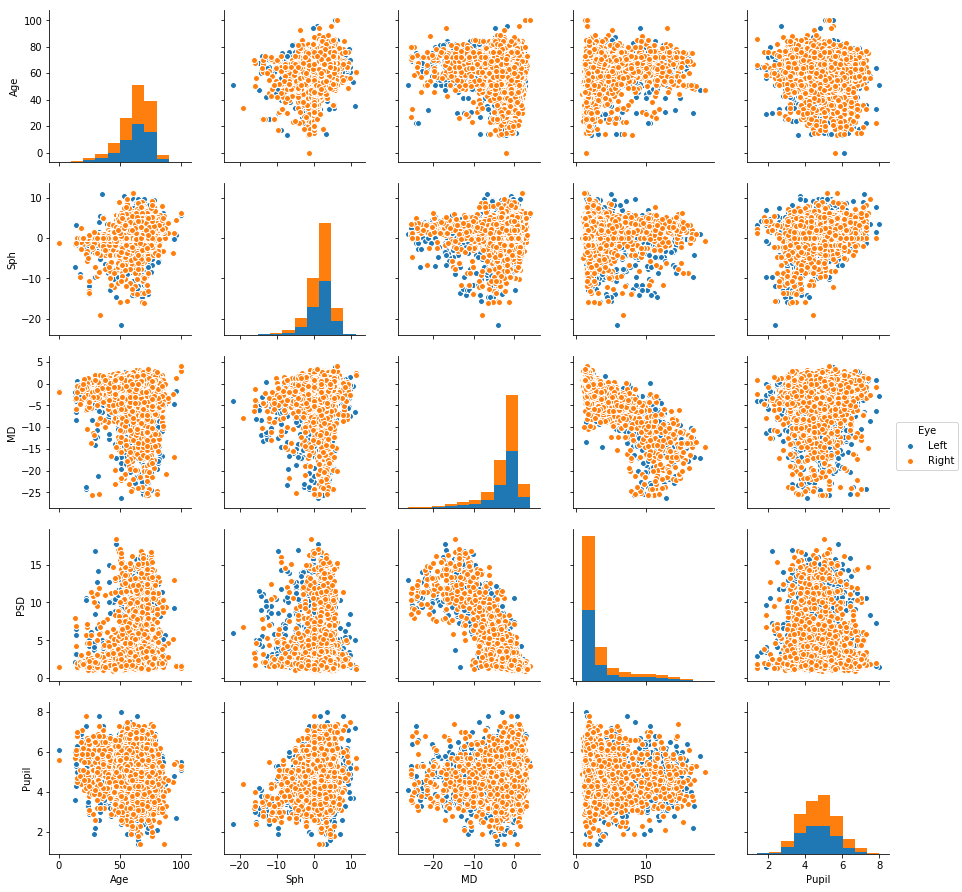

In [131]:
sns.pairplot(data_500, vars =['Age','Sph','MD','PSD','Pupil'],hue='Eye')

In [198]:
#splitting the dataset
reg_train_data, reg_test_data, reg_train_labels, reg_test_labels = cross_validation.train_test_split(x, Y,
                                                                                    test_size = 0.3, random_state = 1)
#standardizating the training data
reg_train_data_sc = preprocessing.scale(reg_train_data)
n = 48
ex = [reg_train_data_sc[n,:]]
ex_l = reg_train_labels[n]

print(ex,ex_l)

regressor1 = SGDRegressor(random_state = 1, n_iter = 2000)
                          #,learning_rate='optimal',loss='squared_loss',penalty='l2')
regressor1.fit(reg_train_data_sc, reg_train_labels)
reg_predictions = regressor1.predict(reg_test_data)

print('Mean absolute error',metrics.mean_absolute_error(reg_test_labels, reg_predictions))
print('R2 score',metrics.r2_score(reg_test_labels, reg_predictions))
print('Root mean squared error',math.sqrt(metrics.mean_squared_error(reg_test_labels, reg_predictions)))



[array([-0.46135366, -0.19383905,  0.84470381,  1.00086397, -0.10301416,
        1.01955366])] -4.11


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:73: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


Mean absolute error 31.2890079276
R2 score -51.203662687
Root mean squared error 32.55170715025447


In [175]:
print(regressor1.intercept_,regressor1.coef_)

[-2.6535252] [ 0.17262477  0.09226112 -3.77859702  0.10204439  0.93849379  0.05305615]


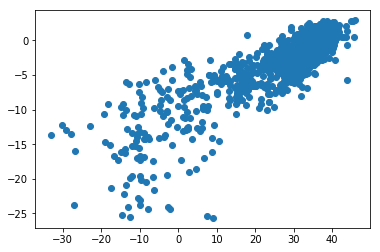

In [168]:
plt.scatter(reg_predictions,reg_test_labels)

In [199]:
predict = regressor1.predict(ex)
print (predict, ex_l )


[-5.88329737] -4.11
